In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Salary_Data_Based_country_and_race.csv') #Lectura de los datos 

In [3]:
data.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
data.columns.values #Column names 

array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'], dtype=object)

## Cuantos valores nulos hay en cada columna 
Como son pocos podemos eliminarlos 

In [5]:
def null_values(data,lista): #Function to know how many null values there are in each column
    null_val = []
    for item in lista:

        null_val.append(pd.isnull(data[item]).values.ravel().sum()) 
        #Add a list of every null value in each column

    return null_val

lista = np.array(['Unnamed: 0', 'Age', 'Gender', 'Education Level', 'Job Title',
       'Years of Experience', 'Salary', 'Country', 'Race'])

valores_nulos = null_values(data,lista)
print('Los valores nulos en cada columna son: ', valores_nulos)

Los valores nulos en cada columna son:  [0, 2, 2, 3, 2, 3, 5, 0, 0]


## Clasification
The variable 'Job Title' has around 200 distinct data points that we need to classify. We cannot assign them a number as it would be completely biased and wouldn't contribute anything to the algorithm. There are several ways to solve this; one is to create a binary column for each value, but this would consume many more resources when applying the algorithms. We choose to identify certain repeated characteristics in the values and create binary columns from them.

In [6]:
pd.get_dummies(data['Job Title']).columns.values.shape

(193,)

In [7]:
data_n = data.copy()

In [8]:
data_n['Job class'] = data_n['Job Title']
def classification(name): #Function to create a column with certain datatype
    data_n[name] = data_n['Job Title']
    job = pd.get_dummies(data_n['Job Title']).columns.values
    for i in job:
        if name in i:
            data_n[name] = data_n[name].replace(i, 1)
        else:
            data_n[name] = data_n[name].replace(i, 0)

We choose this characteristics to clasify

In [9]:
name = ['Developer', 'Scientist', 'Engineer', 'Sales', 'Marketing', 
        'Director', 'Manager', 'Senior', 'HR' or 'Human Resources', 
        'Coordinator', 'Project', 'Designer', 'Software', 'Junior', 
        'Analyst', 'Data', 'Specialist', 'Operations', 'Business', 
        'Financial', 'Product']
for elem in name:
    classification(elem)
data_n

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,...,Designer,Software,Junior,Analyst,Data,Specialist,Operations,Business,Financial,Product
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White,Software Engineer,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,Data Analyst,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White,Senior Manager,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,Sales Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian,Director,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed,Director of Marketing,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian,Sales Associate,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese,Financial Manager,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean,Marketing Manager,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data_new = data_n.copy()

There were several values with the same meaning in the 'Education Level' feature, so we addressed this issue in this line. They were also sorted to go from lower to higher academic degree.


In [11]:
print(pd.get_dummies(data_new['Education Level']).columns.values)
data_new['Education Level'] = data_new['Education Level'].replace(['phD'], ['PhD'])
data_new['Education Level'] = data_new['Education Level'].replace(["Bachelor's Degree"], ["Bachelor's"])
data_new['Education Level'] = data_new['Education Level'].replace(["Master's Degree"], ["Master's"])
data_new['Education Level'] = data_new['Education Level'].replace(["High School"], ["1High School"])
print(pd.get_dummies(data_new['Education Level']).columns.values)

["Bachelor's" "Bachelor's Degree" 'High School' "Master's"
 "Master's Degree" 'PhD' 'phD']
['1High School' "Bachelor's" "Master's" 'PhD']


## Change strings for numbers

In [12]:
def change_values(data1):
#Funcion para cambiar los valores de las columnas por numeros 

    columnas = []
    for item in data1.columns.values:
        if data1[item].dtypes == 'object':
            columnas.append(item)
    #Esta parte crea una lista con valores que no sean floats o integer
            
    for item in columnas:
        valores_columnas = pd.get_dummies(data1[item]).columns.values #Crea una lista cada valor distinto en cada columna
        x = [i for i in range(valores_columnas.shape[0])] #Crea una lista de numeros del 0 hasta la longitud de valores_columnas
        data1[item] = data1[item].replace(valores_columnas, x) #Intercambia los valores
    
    return data1

In [13]:
change_values(data_new)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,...,Designer,Software,Junior,Analyst,Data,Specialist,Operations,Business,Financial,Product
0,0,32.0,1.0,1.0,177.0,5.0,90000.0,3,9,177.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,28.0,0.0,2.0,18.0,3.0,65000.0,4,5,18.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,45.0,1.0,3.0,145.0,15.0,150000.0,1,9,145.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,36.0,0.0,1.0,116.0,7.0,60000.0,4,5,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.0,1.0,2.0,26.0,20.0,200000.0,4,1,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,0.0,3.0,34.0,20.0,200000.0,3,7,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,6700,32.0,1.0,0.0,116.0,3.0,50000.0,0,2,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6702,6702,46.0,1.0,2.0,97.0,14.0,140000.0,2,6,97.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
pd.get_dummies(data_new['Gender']).columns.values

array([0., 1., 2.])

The 'Gender' feature has 3 values, but ideally, we should have two. Therefore, for this change to be valid, we need to have a small number of data points with this value.








In [15]:
print(pd.get_dummies(data['Gender']).columns.values)
print('The number of times other appears is', np.count_nonzero(data['Gender'] == 'Other'))
data_new['Gender'] = data_new['Gender'].replace(2., None) #La variable Other fue ajustada tal que Other == 2., y aqui se reemplaza por NaN



['Female' 'Male' 'Other']
The number of times other appears is 14


Deletes data we don't need 

In [16]:
data2 = data_new.copy()
data2 = data2.dropna(axis=0,how="any") # Deletes aln NaN
data2 = data2.drop('Unnamed: 0', axis = 1) # Deletes the first column 
data2

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Developer,...,Designer,Software,Junior,Analyst,Data,Specialist,Operations,Business,Financial,Product
0,32.0,1.0,1.0,177.0,5.0,90000.0,3,9,177.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,28.0,0.0,2.0,18.0,3.0,65000.0,4,5,18.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,45.0,1.0,3.0,145.0,15.0,150000.0,1,9,145.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36.0,0.0,1.0,116.0,7.0,60000.0,4,5,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,52.0,1.0,2.0,26.0,20.0,200000.0,4,1,26.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,49.0,0.0,3.0,34.0,20.0,200000.0,3,7,34.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,32.0,1.0,0.0,116.0,3.0,50000.0,0,2,116.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,30.0,0.0,1.0,42.0,4.0,55000.0,2,4,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6702,46.0,1.0,2.0,97.0,14.0,140000.0,2,6,97.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
data2.describe()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Job class,Developer,Scientist,...,Designer,Software,Junior,Analyst,Data,Specialist,Operations,Business,Financial,Product
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,...,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,95.141083,8.077723,115307.175194,2.007780,4.869390,95.141083,0.123878,0.095452,...,0.016457,0.205566,0.085727,0.093058,0.144973,0.005236,0.022591,0.005386,0.029473,0.071065
std,7.595994,0.880474,58.905403,6.029305,52806.810881,1.416941,3.386053,58.905403,0.329467,0.293860,...,0.127235,0.404145,0.279982,0.290536,0.352100,0.072179,0.148608,0.073197,0.169142,0.256953
min,21.000000,0.000000,0.000000,0.000000,350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,43.000000,3.000000,70000.000000,1.000000,1.000000,43.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,1.000000,97.000000,7.000000,115000.000000,2.000000,5.000000,97.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,2.000000,159.000000,12.000000,160000.000000,3.000000,9.000000,159.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,62.000000,3.000000,192.000000,34.000000,250000.000000,4.000000,9.000000,192.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns


## Overview of the Data
Using Seaborn, we create a histogram for each of the features to observe their shape, distribution, and if there is anything relevant.

The variables 'Age', 'Salary', and 'Years of Experience' are the only ones that appear to follow a distribution. The others merely constitute a set of quantitative data that do not follow any statistical structure.


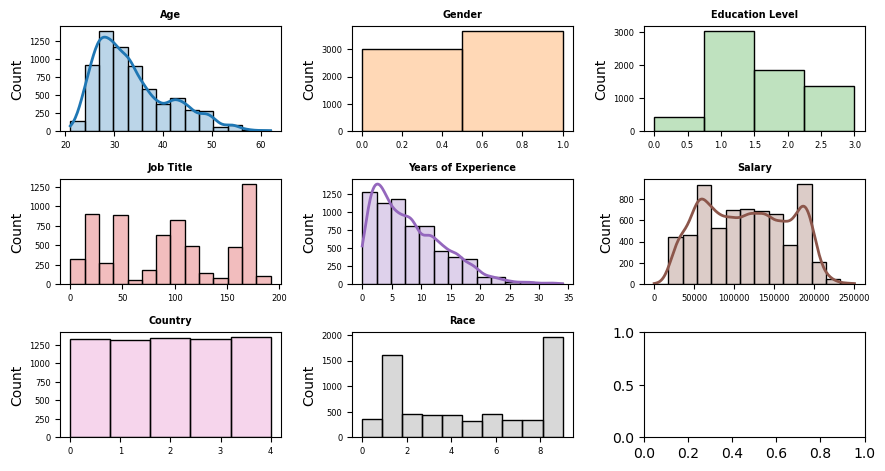

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
for i, colum in enumerate(data2.iloc[:, : 8]):
    if pd.get_dummies(data2[colum]).columns.values.shape[0] <= 12:
        num_bins = pd.get_dummies(data2[colum]).columns.values.shape[0] 
    else:
        num_bins = 14
    with_curve = ['Salary', 'Age', 'Years of Experience']
    if any(colum == var for var in with_curve):
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            kde      = True,
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws = {'linewidth': 2},
            alpha    = 0.3,
            ax       = axes[i]
        )
    else:
        sns.histplot(
            data     = data2,
            bins     = num_bins,
            x        = colum,
            stat     = "count",
            color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            alpha    = 0.3,
            ax       = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)

## Statistics over data

In [20]:
def kurtosis(data): #Funcion para obtener la kurtosis
    
    kurtosis = sum((x - np.mean(data)) ** 4 for x in data) / (len(data)* np.sqrt(np.var(data)) ** 4)

    return kurtosis


In [21]:
import scipy.stats as st
print("Estadistica de Salary:", "media", np.mean(data2['Salary']), "desviacion estandar", np.sqrt(np.var(data2['Salary'])) , "asimetría", st.skew(data2['Salary']),"curtosis", kurtosis(data2['Salary'])) 
print("Estadistica de age:", "media", np.mean(data2['Age']), "desviacion estandar", np.sqrt(np.var(data2['Age'])) , "asimetría", st.skew(data2['Age']),"curtosis", kurtosis(data2['Age'])) 
print("Estadistica de Years of Experience:", "media", np.mean(data2['Years of Experience']), "desviacion estandar", np.sqrt(np.var(data2['Years of Experience'])) , "asimetría", st.skew(data2['Years of Experience']),"curtosis", kurtosis(data2['Years of Experience'])) 


Estadistica de Salary: media 115307.17519449431 desviacion estandar 52802.86049319835 asimetría 0.05822007333517386 curtosis 1.8333653616384324
Estadistica de age: media 33.61056253740275 desviacion estandar 7.595426179335146 asimetría 0.9035624090972223 curtosis 3.1857776484236324
Estadistica de Years of Experience: media 8.077722920406941 desviacion estandar 6.028853832796941 asimetría 0.9654929590194796 curtosis 3.7128109111331815


## Better distribution for each variable

In [22]:
from fitter import Fitter 
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic'] 
#Atributo
fitter_yoe = Fitter(data2['Years of Experience'], distributions= distribuciones)
fitter_yoe.fit()
fitter_yoe.get_best(method = 'sumsquare_error')

fitter_age = Fitter(data2['Age'], distributions= distribuciones)
fitter_age.fit()
fitter_age.get_best(method = 'sumsquare_error')

fitter_salary = Fitter(data2['Salary'], distributions= distribuciones)
fitter_salary.fit()
fitter_salary.get_best(method = 'sumsquare_error')

{'beta': {'a': 2.28162187034553,
  'b': 2.6905738806945516,
  'loc': -360.9251751078708,
  'scale': 251786.29996575214}}

In [23]:
print('La mejor distribucion para salary es ',  fitter_salary.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para age es ',  fitter_age.get_best(method = 'sumsquare_error') )
print('La mejor distribucion para years of experience es ',  fitter_yoe.get_best(method = 'sumsquare_error') )

La mejor distribucion para salary es  {'beta': {'a': 2.28162187034553, 'b': 2.6905738806945516, 'loc': -360.9251751078708, 'scale': 251786.29996575214}}
La mejor distribucion para age es  {'beta': {'a': 2.9553035224015884, 'b': 591187.5126884335, 'loc': 20.55941570772879, 'scale': 2611181.629987646}}
La mejor distribucion para years of experience es  {'beta': {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}}


## Distribution plots

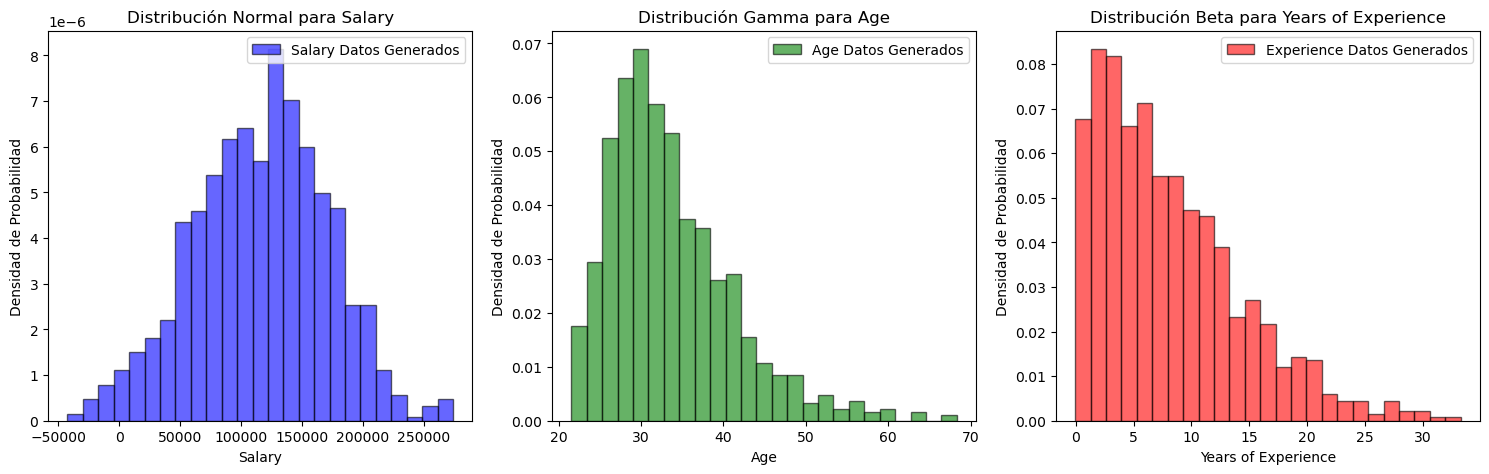

In [24]:
from scipy.stats import norm, gamma, beta

# Distribution parameters
params_salary = {'loc': 115307.17519449431, 'scale': 52802.86049319856}
params_age = {'a': 2.959547949456022, 'loc': 20.556502171474314, 'scale': 4.410814069978799}
params_experience = {'a': 1.2454264202304017, 'b': 5.0842070339355026, 'loc': -0.0625690283767105, 'scale': 41.32924411035516}

datos_salary = np.random.normal(**params_salary, size=1000)
datos_age = gamma.rvs(**params_age, size=1000)
datos_experience = beta.rvs(**params_experience, size=1000)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograms and density curves 

axs[0].hist(datos_salary, bins=25, density=True, alpha=0.6, color='b', label='Salary Datos Generados', edgecolor = 'k')
x_salary = np.linspace(min(datos_salary), max(datos_salary), 500)
axs[0].set_xlabel('Salary')
axs[0].set_ylabel('Densidad de Probabilidad')
axs[0].legend()
axs[0].set_title('Distribución Normal para Salary')

axs[1].hist(datos_age, bins=25, density=True, alpha=0.6, color='green', label='Age Datos Generados', edgecolor = 'k')
x_age = np.linspace(0, 50, 500)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Densidad de Probabilidad')
axs[1].legend()
axs[1].set_title('Distribución Gamma para Age')

axs[2].hist(datos_experience, bins=25, density=True, alpha=0.6, color='red', label='Experience Datos Generados', edgecolor = 'k')
x_experience = np.linspace(0, 1, 1000)
axs[2].set_xlabel('Years of Experience')
axs[2].set_ylabel('Densidad de Probabilidad')
axs[2].legend()
axs[2].set_title('Distribución Beta para Years of Experience')

plt.tight_layout()
plt.show()


## Filtering Method
Here, the order of importance according to the filtering method is provided.

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE


x = data2['Salary']
entrenar = data2.drop(['Salary'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k = 'all').fit(entrenar, x)
score_values = np.sort(seleccionadas.scores_)[::-1]
columnas_ord = np.array(columnas)[np.argsort(seleccionadas.scores_)[::-1]]

for i in range(len(columnas)):
    print(columnas_ord[i], score_values[i])


Years of Experience 63.03785901559479
Age 25.87499459169732
Education Level 19.201646228033525
Junior 15.823139477304764
Sales 11.403588163192648
Engineer 8.543646679112662
Project 8.344502005440168
Operations 8.193507104035554
Developer 7.041331595941567
HR 6.614205473158326
Coordinator 6.322584836144223
Senior 6.142038431761636
Manager 5.926395107963988
Scientist 5.714179251098004
Software 5.438421786484301
Job class 5.323883877241233
Job Title 5.323883877241233
Data 4.356116758615332
Gender 4.306423146062751
Marketing 3.4618901306823227
Financial 3.397839141174133
Product 3.390212644398243
Director 2.5485711078321662
Analyst 2.3675584767166966
Designer 1.7585930176591387
Country 0.9806020764097035
Race 0.9673929362214989
Business 0.6986668115955538
Specialist 0.4821169200800693


In [27]:
from sklearn.ensemble import ExtraTreesClassifier

modelo = ExtraTreesClassifier() 
erec = RFE(modelo)  
erec = erec.fit(entrenar, x)
atrib = erec.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
print("Selected columns:", atributos)

modelo.fit(entrenar, x)
importancias = modelo.feature_importances_
print("Columns importance:", importancias[:])

indices_importantes = np.argsort(importancias)[::-1][:]
atributos_importantes = [columnas[i] for i in indices_importantes]
print('Most important columns ', atributos_importantes)


Atributos seleccionados: ['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Country', 'Race', 'Job class', 'Engineer', 'Marketing', 'Manager', 'Software', 'Analyst', 'Product']
Importancia de atributos: [0.2449453  0.05984068 0.05992514 0.04281848 0.27068717 0.05767882
 0.06758532 0.04427179 0.00840953 0.00625294 0.01012284 0.00910637
 0.01272099 0.00795401 0.01343493 0.00945685 0.00543342 0.0051663
 0.00466595 0.00344272 0.00960098 0.00872502 0.00774068 0.00955009
 0.00129238 0.00343473 0.00114165 0.00610353 0.00849142]
Most important columns  ['Years of Experience', 'Age', 'Race', 'Education Level', 'Gender', 'Country', 'Job class', 'Job Title', 'Manager', 'Marketing', 'Engineer', 'Software', 'Data', 'Senior', 'Sales', 'Junior', 'Product', 'Developer', 'Director', 'Analyst', 'Scientist', 'Financial', 'HR', 'Coordinator', 'Project', 'Designer', 'Operations', 'Specialist', 'Business']


## Correlation plots

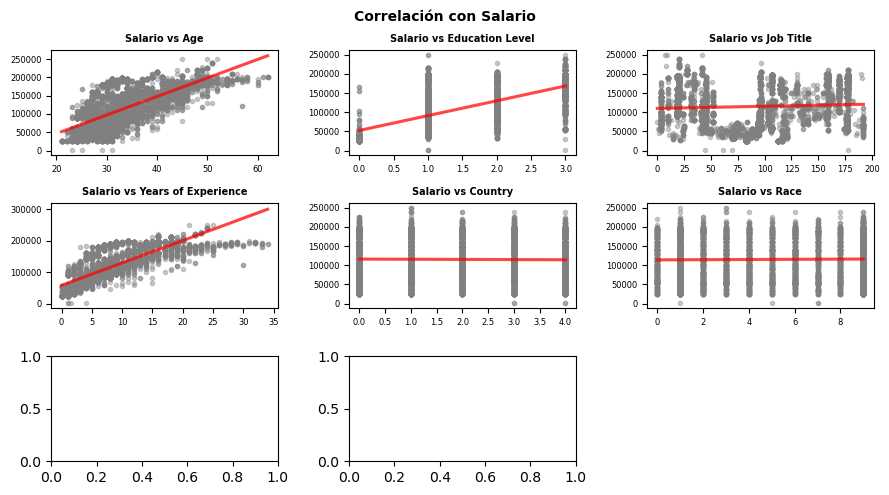

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas = data2.iloc[:, :8].select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Salary') # objetivo

for i, colum in enumerate(columnas):
    sns.regplot(
        x           = data2[colum],
        y           = data2['Salary'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Salario vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Salario', fontsize = 10, fontweight = "bold");

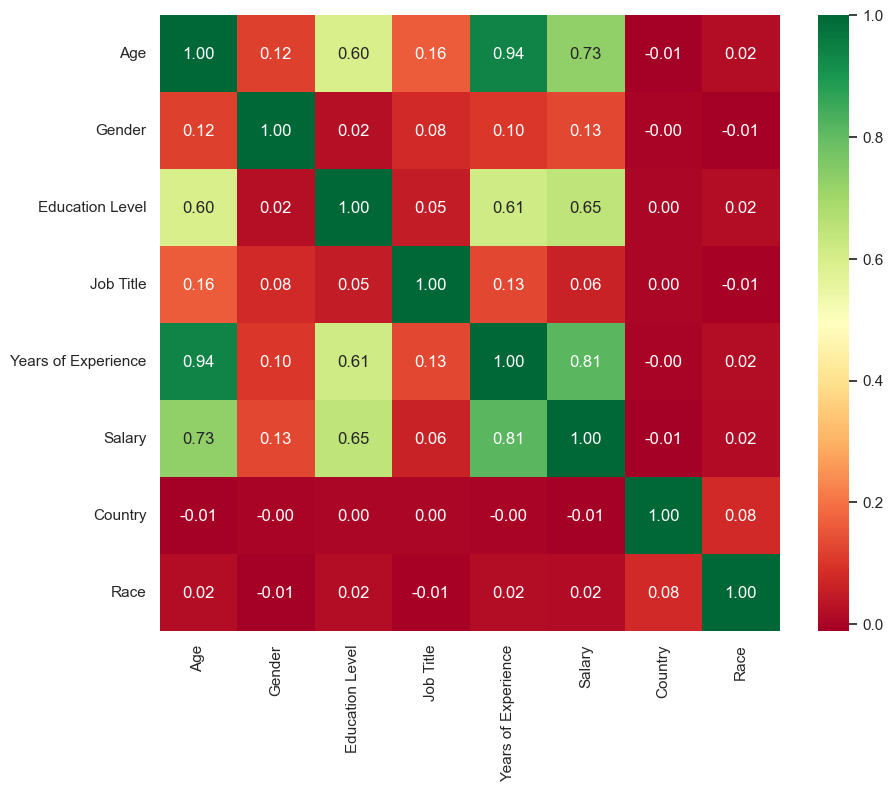

In [29]:
def matrix_corr(data): 
    correlation = data.corr()
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    sns.heatmap(correlation, annot=True, fmt=".2f", cbar=True, cmap="RdYlGn")

matrix_corr(data2.iloc[:, : 8])



We've decided to remove the 'Age' column since it has a very high correlation with the 'Years of Experience' feature. We've also removed other columns with low scores and low correlation with salary.

In [30]:
data_clean = data2.copy()
data_clean = data_clean.drop(['Age', 'Job Title', 'Job class', 'Marketing', 'Financial', 'Specialist',
 'Business', 'Designer', 'Director', 'Race', 'Country', 'Product'], axis = 1)
data_clean

,Gender,Education Level,Years of Experience,Salary,Developer,Scientist,Engineer,Sales,Manager,Senior,HR,Coordinator,Project,Software,Junior,Analyst,Data,Operations
0,1.0,1.0,5.0,90000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,3.0,65000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,3.0,15.0,150000.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,7.0,60000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,0.0,3.0,20.0,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,1.0,0.0,3.0,50000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6701,0.0,1.0,4.0,55000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6702,1.0,2.0,14.0,140000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Export data as a csv 
mi_dataframe = pd.DataFrame(data_clean)
nombre_archivo = 'clean_data.csv'
mi_dataframe.to_csv(nombre_archivo, index=False) 
